# House Prices Predictions

![](img\tehran.jpg)

# 1. Introduction

In this project, we analyze the price of houses of real estates based on their features and we implement models of Machine Learning to predict their Price. This is a supervised task of Machine Learning known as Regression. We will use several algorithms in order to choose the one with the best performance.

We consider a dataset of house prices in Tehran that is available publically at Kaggle (at https://www.kaggle.com/datasets/valakhorasani/tehran-house-prices-dataset), but the techniques can be applied to predict prices in any other city. The idea behind this project is to study several Machine Learning models of Regression.

# 2. Definition of the Business Problem

A real estate store wants to understand what characteristics of the house influence its price and wants to develop a Model to predict the price of houses in a city based on their characteristics.

For this, they have a dataset with information of almost 4000 houses in their city. So, the **objectives** of this project are:

+ Make an Exploratory Data Analysis of the house prices;
+ Develop models to predict the price.

# 3. Data Cleaning

## 3.1 Load Libraries

In [1]:
# Load libraries for data analysis and visualizations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3.2 Load the Dataset

In [2]:
# Load the dataset and take an initial look at its features
df = pd.read_csv('TehranHouse.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


## 3.3 Data Cleaning

In [4]:
# We will keep only the Price in USD
df=df.drop('Price', axis=1)
df=df.rename(columns={'Price(USD)': 'Price'}) 

In [5]:
# Verify if there are missing values
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [6]:
# Since there are only 23 missing values among 3479, we will remove the missing values
df = df.dropna()

In [7]:
# Verify if there are duplicated rows
df.duplicated().sum()

208

In [8]:
# Remove the duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Convert the feature "Area" to numeric
df['Area'] = pd.to_numeric(df['Area'], errors="coerce")
df = df.dropna()

In [10]:
# Transform columns Parking, Warehouse and Elevator to numeric (dummy variables)
df['Parking']=np.where(df['Parking']==True,1,0)
df['Warehouse']=np.where(df['Warehouse']==True,1,0)
df['Elevator']=np.where(df['Elevator']==True,1,0)

After this initial Data Cleaning, we have only one categorical variable, that is Address, and the others are numerical variables.

# 4. Exploratory Data Analysis

## 4.1 Univariate analysis
Let us begin analyzing individually the numerical variables.

In [11]:
# Initial statistical description of the numerical values.
df.describe() 

,Area,Room,Parking,Warehouse,Elevator,Price
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3.242000e+03
mean,107.701110,2.087909,0.845157,0.914250,0.785626,1.824541e+05
std,70.935755,0.765248,0.361810,0.280037,0.410451,2.757539e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+02
25%,70.000000,2.000000,1.000000,1.000000,1.000000,4.733333e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,9.900000e+04
75%,121.000000,2.000000,1.000000,1.000000,1.000000,2.052500e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,3.080000e+06


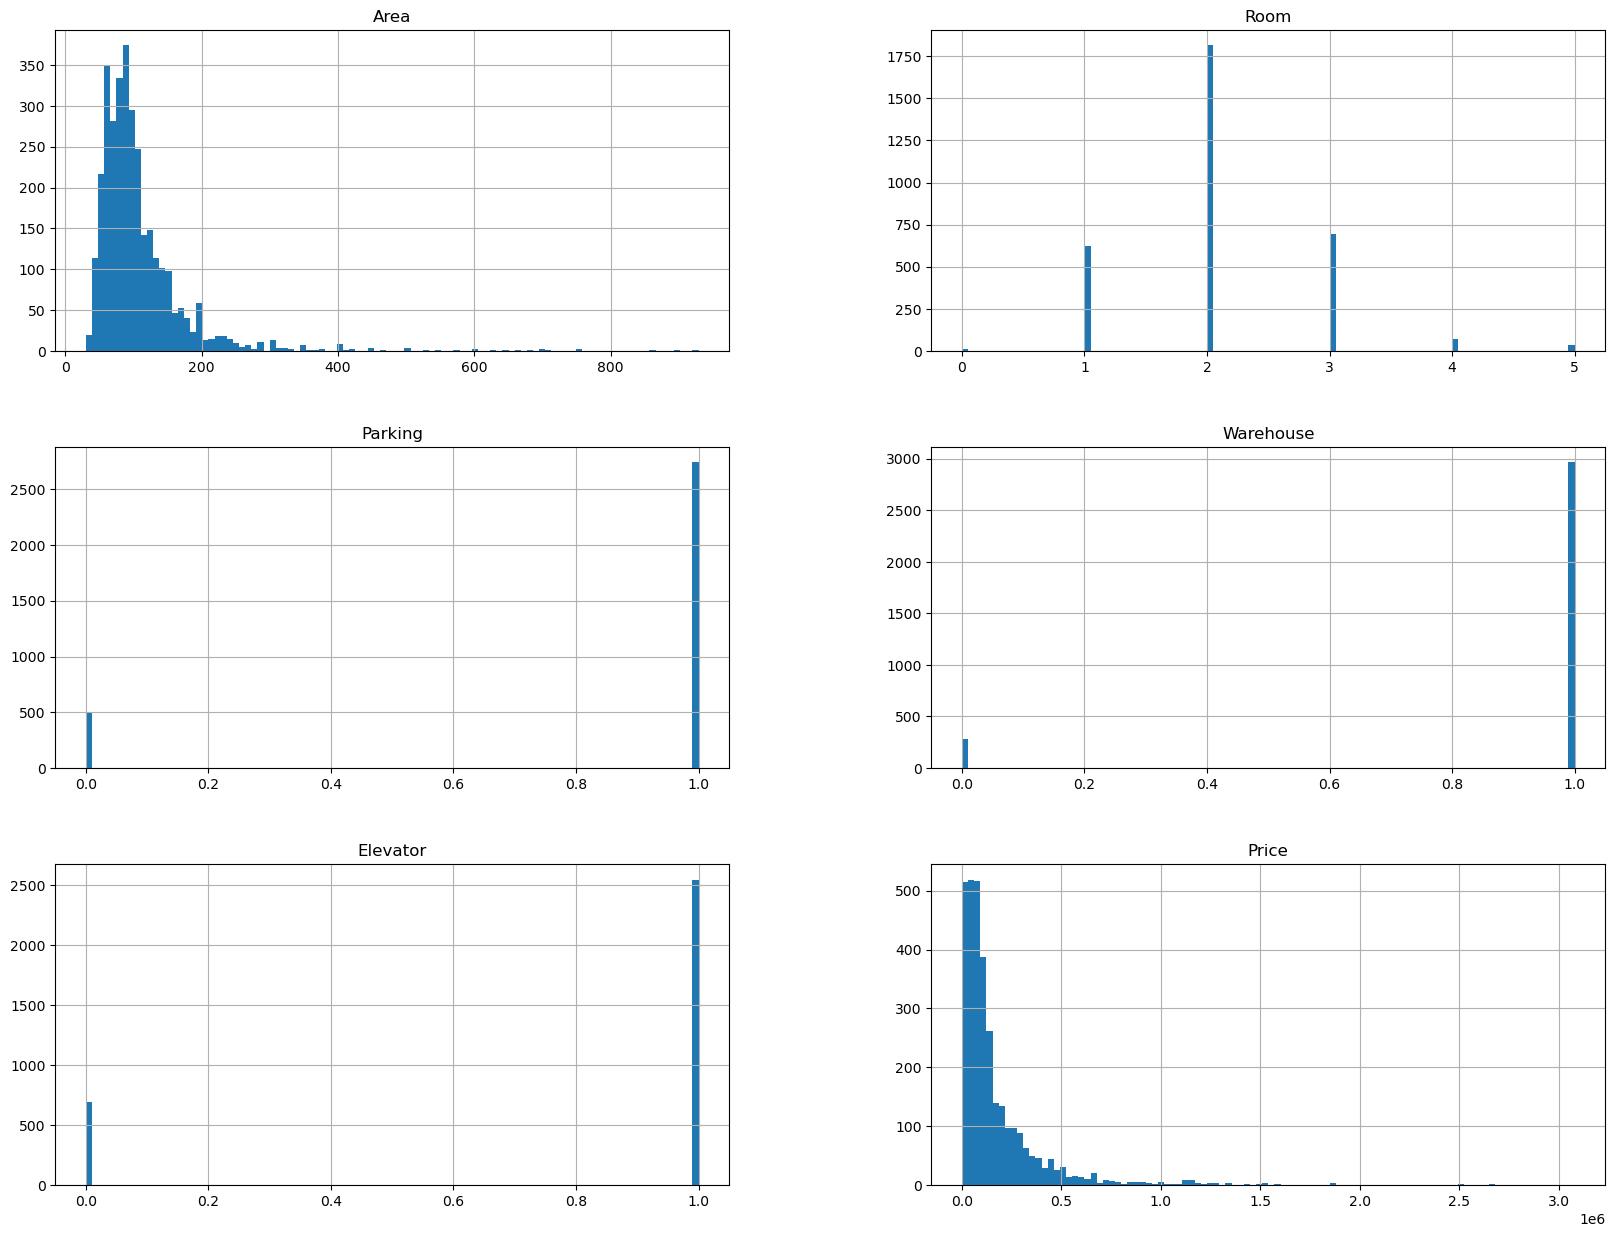

In [12]:
# Visualizing the distribution of the values (histograms)
df.hist(bins = 100, figsize=(20, 15))
plt.show()

The distribution of Areas and Prices are right-skewed, that is, they are very concentrated in the small values but there are several high values. We decided to keep the outliers because they are many and they matter.

Most of the houses have Parking, Warehouse and Elevator. 

## 4.2 Multivariate analysis

Since we have one dependent variable that we are focused (the Price), we want to analyze how the Price is related to the other variables.

In the following, we will visualize the relation of Price with the other variables and study the correlations between the variables.

### 4.2.1 Data Visualization

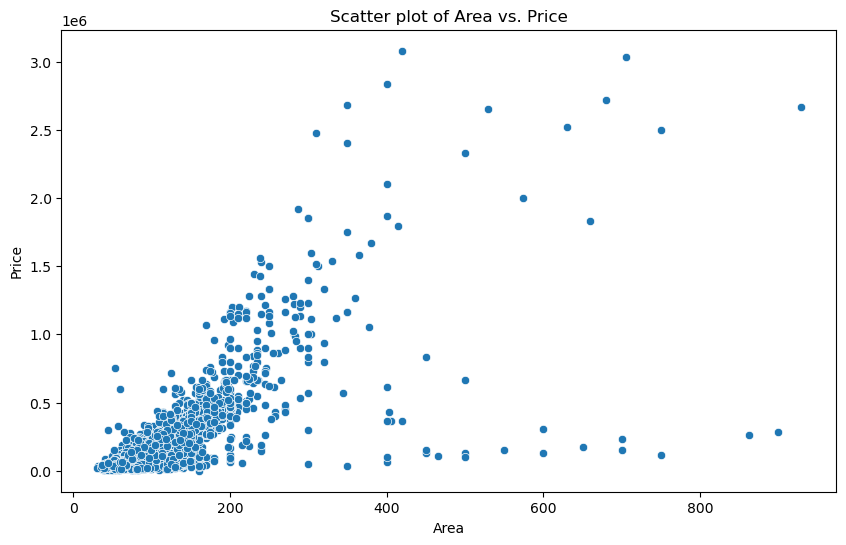

In [13]:
# Scatterplot of Area vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Scatter plot of Area vs. Price')
plt.show()

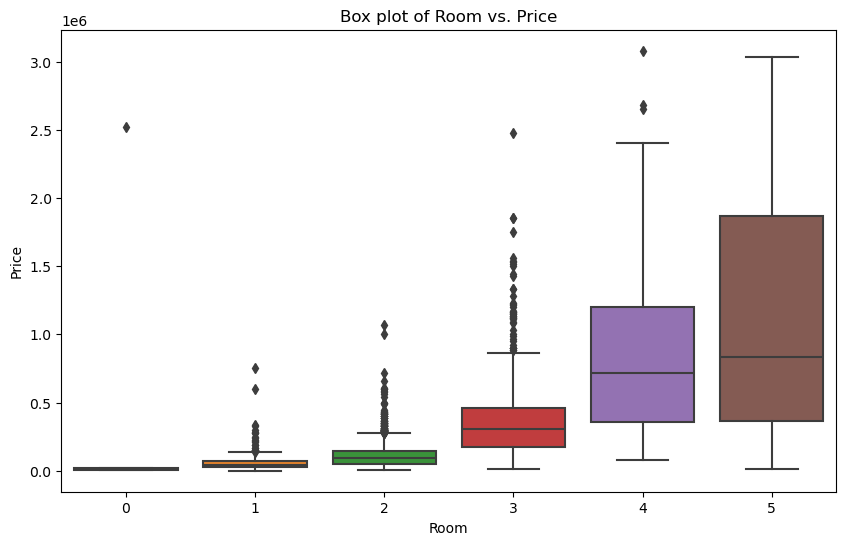

In [14]:
# Boxplots of Room vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Room', y='Price', data=df)
plt.title('Box plot of Room vs. Price')
plt.show()

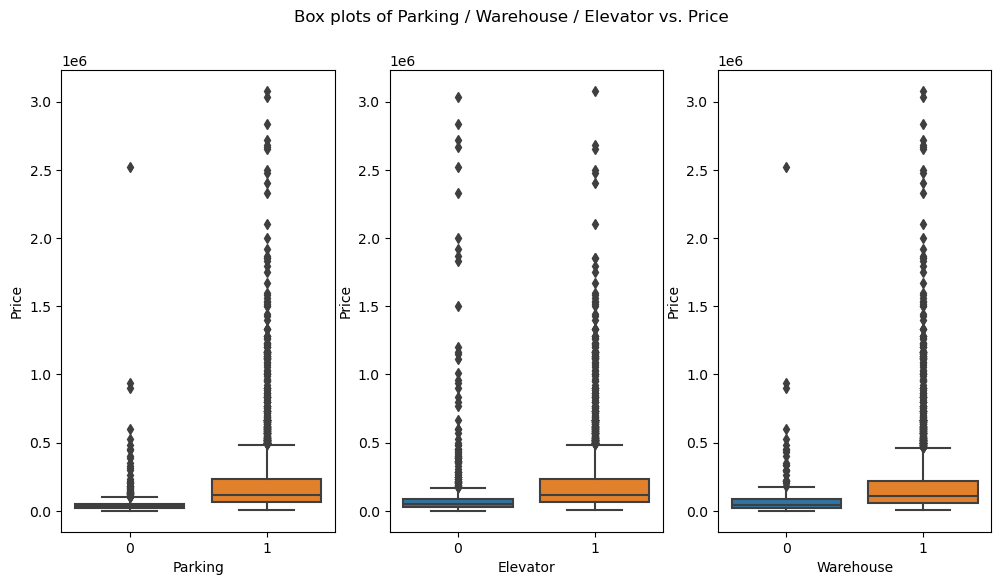

In [15]:
# Boxplots of Parking vs Price, Warehouse vs Price, Elevator vs Price
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle('Box plots of Parking / Warehouse / Elevator vs. Price')
sns.boxplot(ax=ax[0], x='Parking', y='Price', data=df)
sns.boxplot(ax=ax[1], x='Elevator', y='Price', data=df)
sns.boxplot(ax=ax[2], x='Warehouse', y='Price', data=df)
plt.show()

The bivariate analysis above shows that the Price tends to be greater when the Area is greater, and when there are Parking, Warehouse and Elevator. It makes very sense when we think about these possibilities.
This fact can be more precise if we calculate the correlations between the Price and each independent variable.

### 4.2.2 Correlations between the variables

In [16]:
# Let us calculate the correlations between the numerical variables.
df.corr(numeric_only=True)

,Area,Room,Parking,Warehouse,Elevator,Price
Area,1.000000,0.670121,0.200009,0.072364,0.047034,0.720935
Room,0.670121,1.000000,0.278743,0.125894,0.181826,0.569738
Parking,0.200009,0.278743,1.000000,0.429241,0.428801,0.193761
Warehouse,0.072364,0.125894,0.429241,1.000000,0.205098,0.109370
Elevator,0.047034,0.181826,0.428801,0.205098,1.000000,0.110310
Price,0.720935,0.569738,0.193761,0.109370,0.110310,1.000000


The matrix above shows that the Price is more correlated to Area (0.72) and few more to Room (0.57)

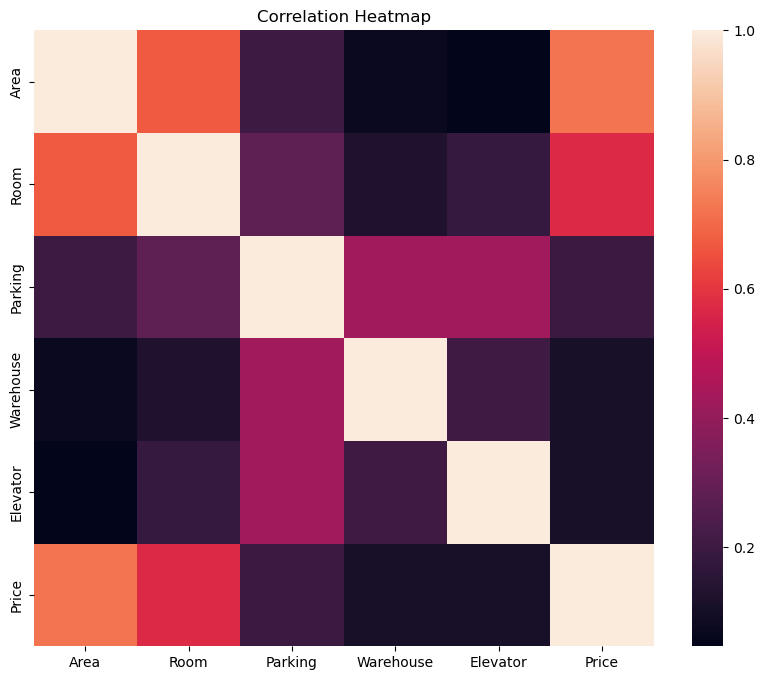

In [17]:
# It is also good to take a look into the correlations in a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True))
plt.title('Correlation Heatmap')
plt.show()

# 5 Feature Engineering (with the categorical feature "Address")

Now we will deal with the categorical variable Address.

In [18]:
# The variable Address assumes many values.
print(f"The variable Address assumes {len(df['Address'].unique())} values.")

The variable Address assumes 192 values.


In [19]:
# How many times does each Address appear in the dataset?
print(df['Address'].value_counts())

Address
Punak                     148
West Ferdows Boulevard    133
Gheitarieh                132
Pardis                    123
Shahran                   123
                         ... 
Firoozkooh Kuhsar           1
Mehrabad                    1
Pakdasht KhatunAbad         1
Kazemabad                   1
Yakhchiabad                 1
Name: count, Length: 192, dtype: int64


In [20]:
df["Address"].value_counts()

Address
Punak                     148
West Ferdows Boulevard    133
Gheitarieh                132
Pardis                    123
Shahran                   123
                         ... 
Firoozkooh Kuhsar           1
Mehrabad                    1
Pakdasht KhatunAbad         1
Kazemabad                   1
Yakhchiabad                 1
Name: count, Length: 192, dtype: int64

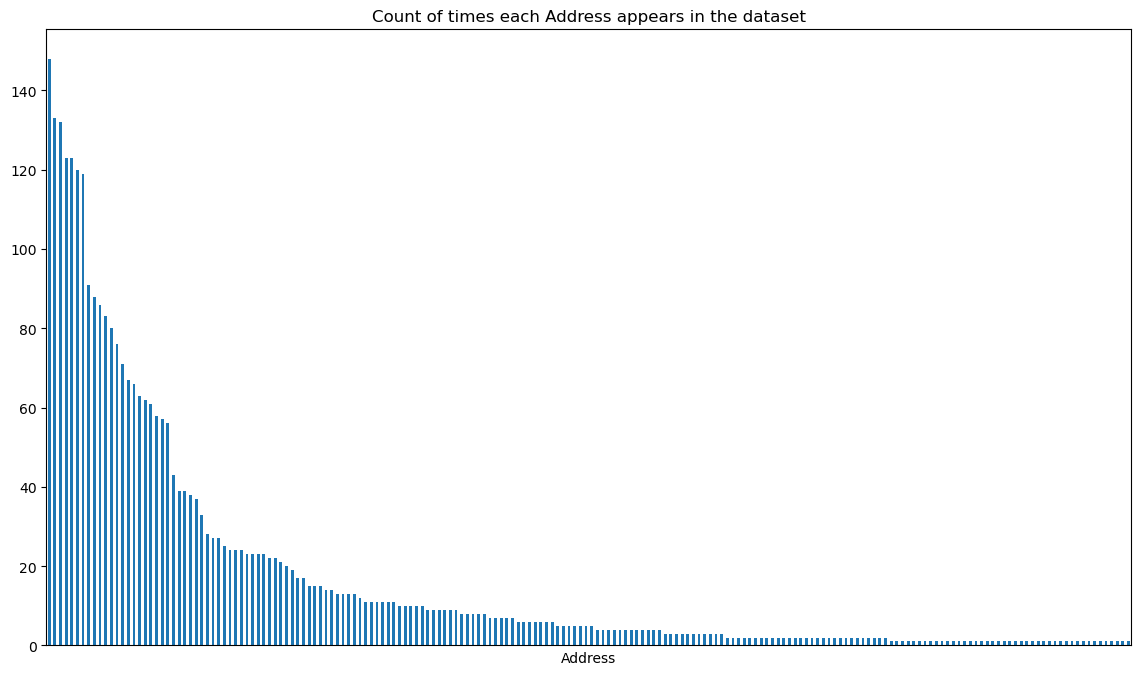

In [21]:
# Visualizing it in a bar graph
plt.figure(figsize = (14, 8))
plt.title("Count of times each Address appears in the dataset")
df["Address"].value_counts().plot(kind='bar')
plt.xticks([])
plt.show()

In [22]:
# We will consider only addresses that appear several times (more than 50). because we consider that there is sufficient information.
times = 50
address_often = df['Address'].value_counts()>times
address_often = df['Address'].unique()[list(np.where(address_often)[0])]
address_often = list(address_often)

print(f"There are {len(address_often)} addresses that appear more than {times} times, they are listed below:")
print(address_often)

There are 22 addresses that appear more than 50 times, they are listed below:
['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb', 'North Program Organization', 'Andisheh', 'West Ferdows Boulevard', 'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi', 'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh', 'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden', 'Water Organization', 'ShahrAra']


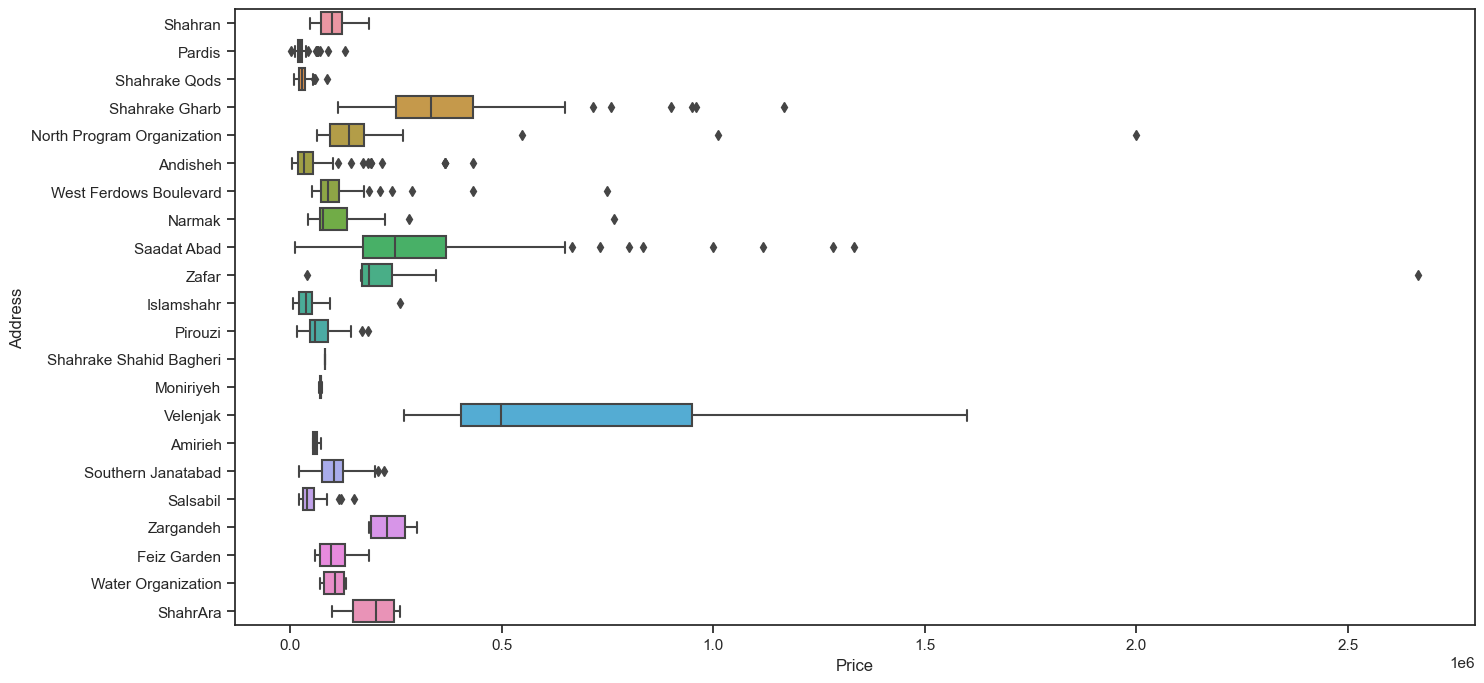

In [23]:
# Visualize the prices in these more often addresses
df_address_often = df.loc[df['Address'].isin(address_often)]

sns.set_theme(style="ticks")
plt.figure(figsize = (16, 8))
sns.boxplot(x=df_address_often['Price'], y= df_address_often['Address'])
plt.show()

We see some 2 outliers with Prices greater than 200.000 that we want to disconsider for this analysis.

There are 170 addresses that appear less or equals than 50 times.


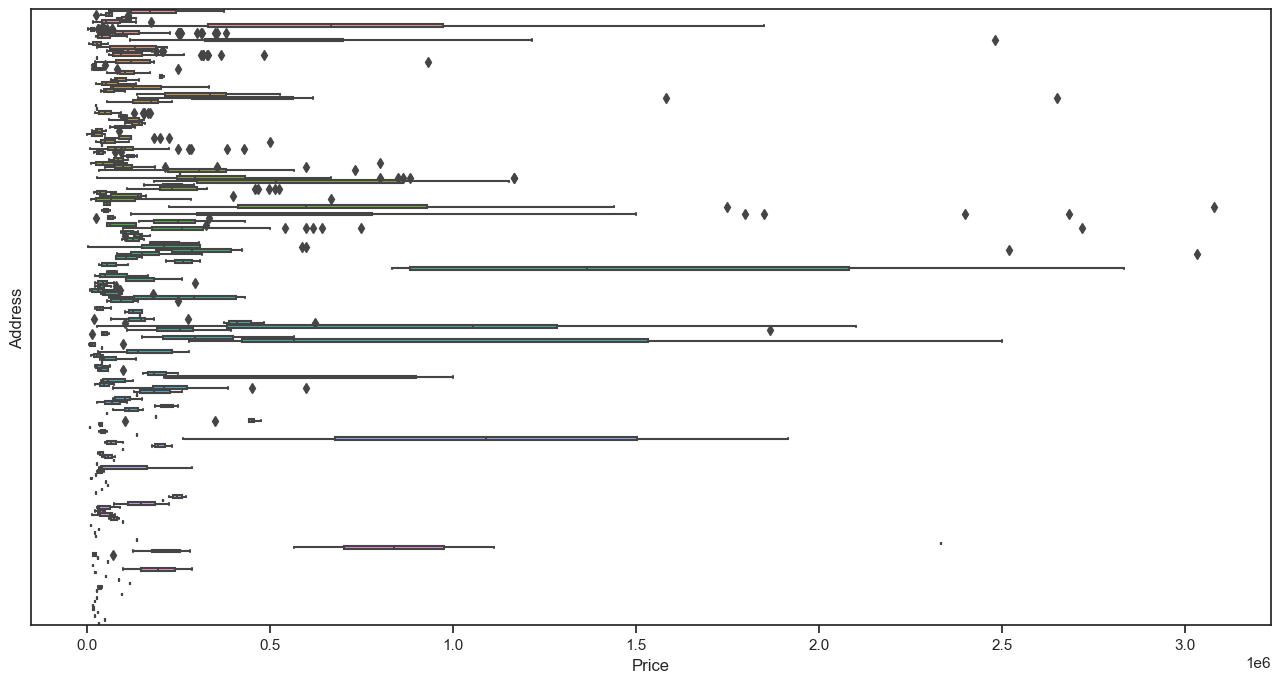

In [24]:
# And how are the Prices in the non-often addresses?
address_not_often = df['Address'].value_counts()<=times
address_not_often = df['Address'].unique()[list(np.where(address_not_often)[0])]
address_not_often = list(address_not_often)

print(f"There are {len(address_not_often)} addresses that appear less or equals than {times} times.")

# Visualize the prices in the not-often addresses
df_address_not_often = df.loc[df['Address'].isin(address_not_often)]

sns.set_theme(style="ticks")
plt.figure(figsize = (16, 8))
sns.boxplot(x=df_address_not_often['Price'], y= df_address_not_often['Address'])
plt.yticks([])  # Do not show the name of the addresses
plt.show()

# 6. Machine Learning Models of Regression

In this Section, we will predict the prices of the house using the following Machine Learning algorithms of Regression:

**Linear Regression:**
+ 6.1 - Simple Linear Regression
+ 6.2 - Multiple Linear Regression
+ 6.3 - Lasso Regression
+ 6.4 - Ridge Regression
  
**Models based on trees:**
+ 6.5 - Decision tree

**Ensemble:**
+ 6.6 - Random Forest

**Boosting:**
+ 6.7 - Gradient Boosting
+ 6.8 - LGBM (Light Gradient Boosting Machine) Regression
+ 6.9 - XGBoost
+ 6.10 - CatBoost

## Evaluation Metrics

We will evaluate each model with the following metrics: R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSQ) and Root Mean Squared Error (RMSE). 
We are going to look for the best performance with respect to Root Mean Squared Error (RMSE).

In [25]:
# Metrics for evaluation
import sklearn.metrics as metrics

def evaluate_model(y_test, y_pred):
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)

    print('R-squared: ', round(r2,4))
    print('Mean Absolute Error (MAE): ', round(mean_absolute_error,4))
    print('Mean Squared Error (MSQ): ', round(mse,4))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(mse),4))

    return r2, np.sqrt(mse)

## 6.1 Simple Linear Regresion: price ~ area

This the simplest model for Regression, let us begin with this. Since Area is the variable more correlated to the Price, let us check their relation.

In [26]:
# Loading the libraries
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS

In [27]:
# Splitting the data into train and test
X = df['Area']
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [28]:
# Training Model 1 (Simple Linear Regression: price ~ area)
model1 = OLS(y_train,X_train)
model1_fit = model1.fit()
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.616
Model:                            OLS   Adj. R-squared (uncentered):              0.615
Method:                 Least Squares   F-statistic:                              3632.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):                        0.00
Time:                        12:00:05   Log-Likelihood:                         -31077.
No. Observations:                2269   AIC:                                  6.216e+04
Df Residuals:                    2268   BIC:                                  6.216e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Area        2040.3658     33.855     60.269      0.000    1973.977    2106.755
==============================================================================
Omnibus:                     1637.900   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79981.679
Skew:                           2.862   Prob(JB):                         0.00
Kurtosis:                      31.517   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Evaluate Model 1
y_pred = model1_fit.predict(X_test)
r2_1, rmse_1 = evaluate_model(y_test, y_pred)

R-squared:  0.4916
Mean Absolute Error (MAE):  106529.0028
Mean Squared Error (MSQ):  28462440032.8861
Root Mean Squared Error (RMSE):  168708.1505


In [30]:
# Notice the standard deviation of the Prices in this Dataset.
print("The standard deviation of the Prices in this Dataset is:",df['Price'].std())

The standard deviation of the Prices in this Dataset is: 275753.90448738827


**Result of Model 1**: RMSE = 168708.1505

Although it seems a large value, the RMSE obtained is small compared to the standard deviation.

#### Visualizing the Regression Line and the Histogram of Residuals

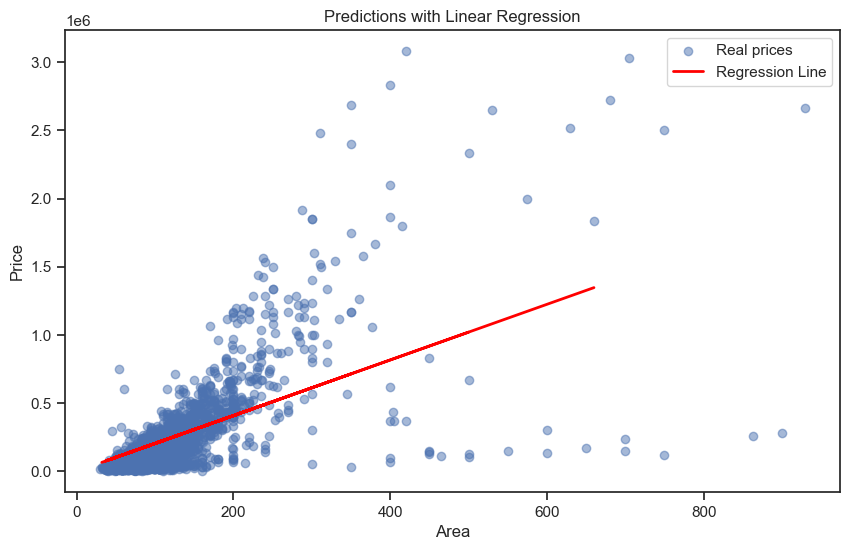

In [31]:
# Predicted values
df['Predicted'] = y_pred

# Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Price'], label='Real prices', alpha=0.5)
plt.plot(df['Area'], df['Predicted'], color='red', label='Regression Line', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Predictions with Linear Regression')
plt.legend()
plt.show()

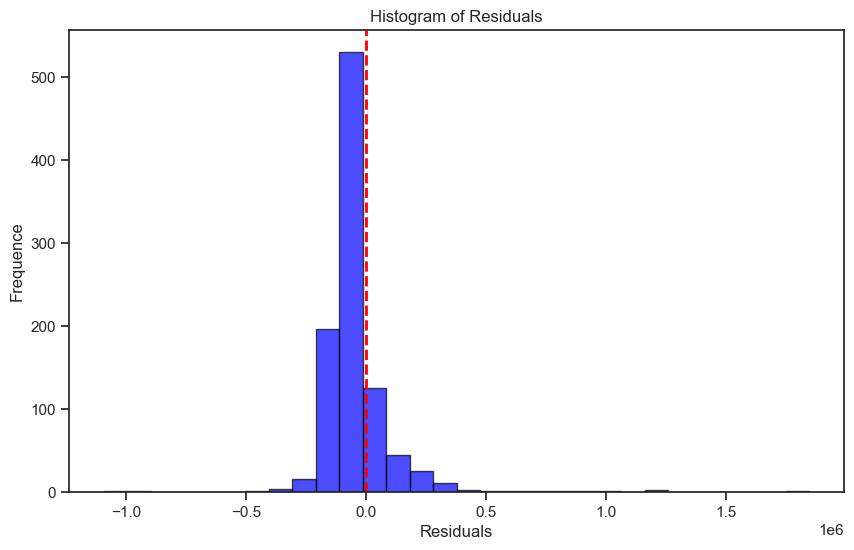

In [32]:
# Residuals
df['residuals'] = df['Price'] - df['Predicted']

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(df['residuals'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequence')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.show()

## 6.2 Multiple Linear Regression

#### Pre-processing

In [33]:
# Remove columns Predicted and Residuals (created to visualize Model 1)
df = df.drop(["Predicted", "residuals"], axis=1)

In [34]:
# Encode (get dummies) the categorical variables Address that appears more often
df_dummies = pd.get_dummies(df, columns=['Address'])
df_dummies_address= df_dummies[["Address_" + x for x in address_often]]
df_dummies_address = df_dummies_address.astype(int)
df = pd.concat([df, df_dummies_address], axis=1)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Address_Shahran,Address_Pardis,Address_Shahrake Qods,...,Address_Shahrake Shahid Bagheri,Address_Moniriyeh,Address_Velenjak,Address_Amirieh,Address_Southern Janatabad,Address_Salsabil,Address_Zargandeh,Address_Feiz Garden,Address_Water Organization,Address_ShahrAra
0,63.0,1,1,1,1,Shahran,61666.67,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.0,1,1,1,1,Shahran,61666.67,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,2,1,1,1,Pardis,18333.33,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,95.0,2,1,1,1,Shahrake Qods,30083.33,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,123.0,2,1,1,1,Shahrake Gharb,233333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Consider the dataframe without the column Address, so that all the dependent variables become numerical 
df_withouth_address = df.drop('Address', axis=1)

In [36]:
# Splitting into train and test
X = df_withouth_address.loc[:, df_withouth_address.columns != 'Price']
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [37]:
# Fitting Model 2
model2 = OLS(y_train.astype(float),X_train.astype(float))
model2_fit = model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              166.5
Date:                Thu, 14 Nov 2024   Prob (F-statistic):                        0.00
Time:                        12:00:06   Log-Likelihood:                         -30913.
No. Observations:                2269   AIC:                                  6.188e+04
Df Residuals:                    2242   BIC:                                  6.203e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Area                                2172.4260     76.994     28.215      0.000    2021.439    2323.413
Room                                3.078e+04   6930.613      4.441      0.000    1.72e+04    4.44e+04
Parking                             -1.95e+04   1.46e+04     -1.336      0.182   -4.81e+04    9116.793
Warehouse                          -7.574e+04   1.39e+04     -5.451      0.000   -1.03e+05   -4.85e+04
Elevator                           -3872.2339    1.2e+04     -0.323      0.746   -2.74e+04    1.96e+04
Address_Shahran                    -4.275e+04   2.24e+04     -1.908      0.057   -8.67e+04    1197.619
Address_Pardis                     -1.532e+05   2.22e+04     -6.899      0.000   -1.97e+05    -1.1e+05
Address_Shahrake Qods              -1.447e+05   3.15e+04     -4.594      0.000   -2.07e+05    -8.3e+04
Address_Shahrake Gharb              1.114e+05   3.27e+04      3.402      0.001    4.72e+04    1.76e+05
Address_North Program Organization  2.759e+04   4.77e+04      0.578      0.563    -6.6e+04    1.21e+05
Address_Andisheh                     -1.4e+05   2.66e+04     -5.257      0.000   -1.92e+05   -8.77e+04
Address_West Ferdows Boulevard      -2.35e+04    2.1e+04     -1.121      0.262   -6.46e+04    1.76e+04
Address_Narmak                     -2.673e+04   4.91e+04     -0.544      0.586   -1.23e+05    6.96e+04
Address_Saadat Abad                 5.712e+04   2.17e+04      2.630      0.009    1.45e+04    9.97e+04
Address_Zafar                       7.181e+04   7.64e+04      0.940      0.348   -7.81e+04    2.22e+05
Address_Islamshahr                  -1.32e+05   3.65e+04     -3.619      0.000   -2.03e+05   -6.05e+04
Address_Pirouzi                    -7.181e+04   3.38e+04     -2.124      0.034   -1.38e+05   -5519.292
Address_Shahrake Shahid Bagheri    -6.979e+04   2.01e+05     -0.347      0.729   -4.64e+05    3.25e+05
Address_Moniriyeh                  -9.459e+04   1.42e+05     -0.665      0.506   -3.74e+05    1.84e+05
Address_Velenjak                    3.995e+05   4.93e+04      8.109      0.000    3.03e+05    4.96e+05
Address_Amirieh                    -7.562e+04   9.01e+04     -0.839      0.401   -2.52e+05    1.01e+05
Address_Southern Janatabad         -2.905e+04   2.73e+04     -1.064      0.288   -8.26e+04    2.45e+04
Address_Salsabil                   -5.465e+04   3.24e+04     -1.687      0.092   -1.18e+05    8873.913
Address_Zargandeh                   2045.2077   1.01e+05      0.020      0.984   -1.95e+05    1.99e+05
Address_Feiz Garden                -4.366e+04   4.53e+04     -0.964      0.335   -1.33e+05    4.52e+04
Address_Water Organization         -7.053e+04   1.01e+05     -0.700      0.484   -2.68e+05    1.27e+

In [38]:
# Evaluate Model 2
y_pred = model2_fit.predict(X_test)

r2_2, rmse_2 = evaluate_model(y_test, y_pred)

R-squared:  0.5474
Mean Absolute Error (MAE):  86423.3474
Mean Squared Error (MSQ):  25338217744.1918
Root Mean Squared Error (RMSE):  159179.8283


**Result of Model 2**: RMSE = 159179.8283

This performance is better than the previous one.

### A variation: Multiple Linear Regression with only 2 dependent variables: price ~ area + room

In the exploratory data analysis, we saw that many variables are not correlated to the Price. It is interesting to consider only some columns, so we will make a multiple linear regression considering only the dependent variables Area and Room.

In [39]:
# Restricting only to the dependent variables Area and Room and the independent variable Price
X = df[['Area', "Room"]]
y = df['Price']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Fitting the Model 2.b
model2b = OLS(y_train.astype(float),X_train.astype(float))
model2b_fit = model2b.fit()
model2b_fit.summary()

# Evaluating Model 2.b
y_pred = model2b_fit.predict(X_test)
r2_2b, rmse_2b = evaluate_model(y_test, y_pred)

R-squared:  0.5253
Mean Absolute Error (MAE):  98369.2981
Mean Squared Error (MSQ):  26576539557.3546
Root Mean Squared Error (RMSE):  163023.1258


**Result of Model 2.b**: RMSE = 163023.1258.

This variation did not obtain a better RMSE.

## 6.3 Lasso Regression

Lasso (L1) Regression tends to produce sparse solutions.

In [40]:
# Loading the library
from sklearn.linear_model import Lasso

# Define and train Model 3
model3 = Lasso()  
model3.fit(X_train, y_train)

# Evaluate Model 3
y_pred = model3.predict(X_test)
r2_3, rmse_3 = evaluate_model(y_test, y_pred)

R-squared:  0.5389
Mean Absolute Error (MAE):  92142.3064
Mean Squared Error (MSQ):  25811458998.2746
Root Mean Squared Error (RMSE):  160659.4504


**Result of Model 3**: RMSE = 160659.4504

It is not better than Model 2.

## 6.4 Ridge Regression

Ridge (L2) penalizes high values.

In [41]:
# Loading the library
from sklearn.linear_model import Ridge

# Define and train Model 4
model4 = Ridge()  
model4.fit(X_train, y_train)

# Evaluate Model 4
y_pred = model4.predict(X_test)
r2_4, rmse_4 = evaluate_model(y_test, y_pred)

R-squared:  0.5391
Mean Absolute Error (MAE):  92117.6976
Mean Squared Error (MSQ):  25805308519.3233
Root Mean Squared Error (RMSE):  160640.3079


**Result of Model 4**: RMSE = 160640.3079

Again not better than Model 2.

## 6.5 Decision Tree

Now we move to another kind of algorithms that are not linear. Possibly they will obtain a better performance because they can capture nonlinear relations between the variables.

In [42]:
# Loading the libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [43]:
# Consider again all the numerical dependent variables
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [44]:
# Create and fit Model 5
model5 = DecisionTreeRegressor(max_depth=3)  # We choose max_depth=3 to have a better visualization of the tree
model5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [45]:
# Evaluate Model 5
y_pred = model5.predict(X_test)
r2_5, rmse_5 = evaluate_model(y_test, y_pred)

R-squared:  0.626
Mean Absolute Error (MAE):  85117.7741
Mean Squared Error (MSQ):  29987589377.9794
Root Mean Squared Error (RMSE):  173169.2507


#### Visualizing the Decision Tree

Text(0.5, 1.0, 'Visualization of the Decision Tree')

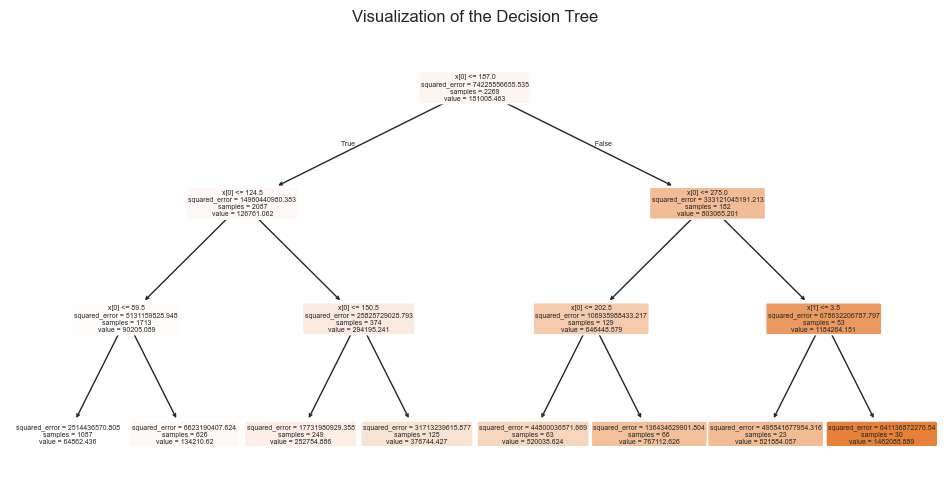

In [46]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model5, filled=True, rounded=True)
plt.title('Visualization of the Decision Tree')

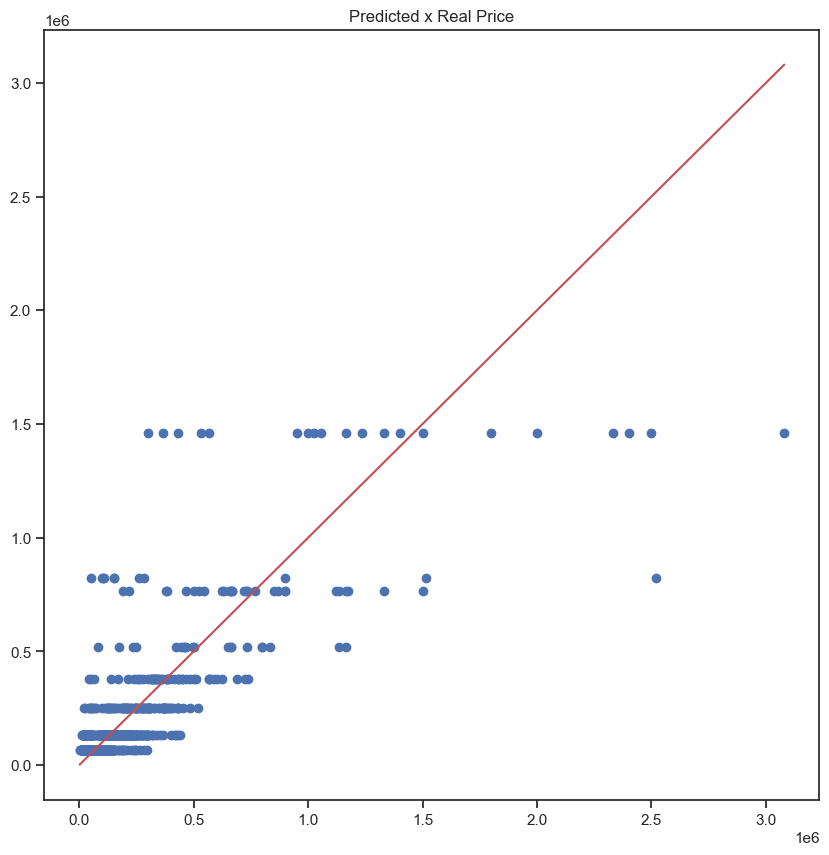

In [47]:
# Visualizings Predict x Real Prices
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.title('Predicted x Real Price')
plt.show()

**Result of Model 5**: RMSE = 173169.2507

The RMSE is worst, but the R-squared is greater than all the previous models..

# 6.6 Random Forest

It is possible to improve the result obtained by a Decision Tree if we use a method that considers several trees, this is called ensemble methods.

In [48]:
# Loading the libraries
from sklearn.ensemble import RandomForestRegressor

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit Model 6
model6 = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=2)
model6.fit(X_train, y_train)

# Evaluate Model 6
y_pred = model6.predict(X_test)
r2_6, rmse_6 = evaluate_model(y_test, y_pred)

R-squared:  0.7232
Mean Absolute Error (MAE):  69461.1189
Mean Squared Error (MSQ):  19537411134.42
Root Mean Squared Error (RMSE):  139776.2896


**Result of Model 6**: RMSE = 139776.2896

This Model performs better than all the previous, both with respect to the RMSE and to the R-squared.

# 6.7 Gradient Boosting

Let us try some boosting methods

In [49]:
# Load the libraries
from sklearn.ensemble import GradientBoostingRegressor

# Define and train Model 7
model7 = GradientBoostingRegressor(max_depth=3, n_estimators=100, random_state=2)
#    n_estimators=100,        # Número de árvores
#    learning_rate=0.1,       # Taxa de aprendizado
#    max_depth=3,             # Profundidade máxima das árvores
#    min_samples_split=2,     # Número mínimo de amostras para div7dir um nó
#    random_state=2
#)
model7.fit(X_train, y_train)

# Evaluate Model 7
y_pred = model7.predict(X_test)
r2_7, rmse_7 = evaluate_model(y_test, y_pred)

R-squared:  0.7176
Mean Absolute Error (MAE):  63899.5698
Mean Squared Error (MSQ):  19927644056.2497
Root Mean Squared Error (RMSE):  141165.3076


**Result of Model 7**: RMSE = 141165.3076

This Model performs slightly worse than the previous.

## 6.8 Light Gradient Boosting Machine (LGBM)

In [50]:
# Load the library
from lightgbm import LGBMRegressor

# Define and train Model 8
model8 = LGBMRegressor() 
model8.fit(X_train, y_train)

# Evaluate Model 8
y_pred  = model8.predict(X_test)
r2_8, rmse_8 = evaluate_model(y_test, y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 2269, number of used features: 17
[LightGBM] [Info] Start training from score 181358.891458
R-squared:  0.7307
Mean Absolute Error (MAE):  66414.8461
Mean Squared Error (MSQ):  19008285194.7879
Root Mean Squared Error (RMSE):  137870.5378


**Result of Model 8**: RMSE = 137870.5378

The RMSE and R-squared are the best.

## 6.9 XGBoost

In [51]:
# Load the library
import xgboost as xgb

# Define and train Model 9
model9 = xgb.XGBRegressor(objective="reg:squarederror", 
                         colsample_bytree=0.3, 
                         learning_rate=0.1, 
                         max_depth=4, 
                         alpha=10,
                         n_estimators=100)
model9.fit(X_train, y_train)

# Evaluate Model 9
y_pred  = model9.predict(X_test)
r2_9, rmse_9 = evaluate_model(y_test, y_pred)

R-squared:  0.7207
Mean Absolute Error (MAE):  66866.4294
Mean Squared Error (MSQ):  19714248813.5796
Root Mean Squared Error (RMSE):  140407.4386


**Result of Model 9**: RMSE = 140407.4386
The performance is good, but worse than LGBM (6.8). Maybe if we tune the hyperparameter we can still improve it.t.

## 6.10 CatBoost

In [52]:
# Load the library
import catboost
from catboost import CatBoostRegressor

# Define and train Model 10
model10 = CatBoostRegressor(iterations=1000, 
                          learning_rate=0.05, 
                          depth=5, 
                          loss_function='RMSE', verbose=0)
model10.fit(X_train, y_train)

# Evaluate Model 10
y_pred  = model10.predict(X_test)
r2_10, rmse_10 = evaluate_model(y_test, y_pred)

R-squared:  0.6637
Mean Absolute Error (MAE):  65656.3666
Mean Squared Error (MSQ):  23738181977.8844
Root Mean Squared Error (RMSE):  154072.0026


**Result of Model 10**: RMSE = 154072.0026

The result is worse than many previous.

# 7. Tuning hyper-parameters

Let us improve the performances by choosing appropriate hyper-parameters. In this Section we won´t do it for all the algorithms, but only for Decision Tree, Random Forest, XGBoost and CatBoost.

## 7.1 For Decision Tree (Model 5)

In [53]:
# Import library
from sklearn.model_selection import GridSearchCV

# Silent warnings
import warnings
warnings.filterwarnings("ignore")

In [54]:
# Grid of parameters
param_grid = {
    'max_depth': [2, 5, 10, 15,20,30,40],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [55]:
# Grid Search
grid_search = GridSearchCV(estimator=model5, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [56]:
# Model 5b = Model 5 with new hyper-parameters

# Create and fit Model 5b
model5b = DecisionTreeRegressor(**grid_search.best_params_)  # We choose max_depth=3 to have a better visualization of the tree
model5b.fit(X_train, y_train)

# Evaluate Model 5b
y_pred = model5b.predict(X_test)
r2_5b, rmse_5b = evaluate_model(y_test, y_pred)

R-squared:  0.6474
Mean Absolute Error (MAE):  68665.9201
Mean Squared Error (MSQ):  24882964079.7532
Root Mean Squared Error (RMSE):  157743.3488


**Result of Model 5b:** The performance (RMSE) is better than Model 5, but still don´t beat the perfomance other Models

## 7.2 For Random Forest (Model 6)

In [57]:
# Grid of parameters
param_grid = {
    'n_estimators': [40, 50, 100],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [58]:
grid_search = GridSearchCV(estimator=model6, scoring='neg_root_mean_squared_error', param_grid=param_grid, cv=3)
grid_search.fit(X, y)

print("Best hyper-parameters for Random Forest:", grid_search.best_params_)

Best hyper-parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [59]:
# Model 6b = Model 6 with new hyper-parameters

# Create and fit Model 6b
model6b = RandomForestRegressor(max_depth=20, n_estimators=50, max_features= 'sqrt', min_samples_leaf = 1, random_state=2)
model6b.fit(X, y)

# Evaluate Model 6b
y_pred = model6b.predict(X_test)
r2_6b, rmse_6b = evaluate_model(y_test, y_pred)

R-squared:  0.8999
Mean Absolute Error (MAE):  45981.8796
Mean Squared Error (MSQ):  7063970633.8345
Root Mean Squared Error (RMSE):  84047.4309


**Result of Model 6b:**  Wow!!! It improved a lot, the RMSE now is 84047.4309, and the R-squared is 0.8999. This is the best obtained.

## 7.3 - For LGBM

It is very expensive to use GridSearch for LGBM, instead we will use RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [60]:
# Import library
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50, 100],
    'max_depth': [-1, 3, 5, 7, 10],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1],
}

In [61]:
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model8, 
    param_distributions=param_grid, 
    n_iter=50,
    cv=3,
    verbose=0,
    scoring='neg_mean_squared_error',
    random_state=2
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

print(f"Best hyperparameters for LGBM: {random_search.best_params_}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 1512, number of used features: 9
[LightGBM] [Info] Start training from score 180801.937633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [62]:
# Define and train Model 8b
model8b = LGBMRegressor(**random_search.best_params_) 
model8b.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 2269, number of used features: 20
[LightGBM] [Info] Start training from score 181358.891458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(colsample_bytree=0.8, max_depth=7, min_child_samples=10,
              num_leaves=20, reg_alpha=0.1, reg_lambda=1, subsample=0.9)

In [63]:
# Evaluate Model 8b
y_pred  = model8b.predict(X_test)
r2_8b, rmse_8b = evaluate_model(y_test, y_pred)

R-squared:  0.7341
Mean Absolute Error (MAE):  64462.0865
Mean Squared Error (MSQ):  18768456946.9186
Root Mean Squared Error (RMSE):  136998.018


**Conclusion**: RMSE = 136998.018.

Tuning hyper-parameter improved the performance with respect to Model 8, but it is not better than Model 6b.

## 7.4 - For XGBoost

In [64]:
# Parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [40, 50, 100, 200],
    'colsample_bytree': [0.3, 0.5, 0.8],
}

# Create GridSearch
grid_search = GridSearchCV(estimator=model9, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=3)

In [65]:
# Use GridSearch with our data
grid_search.fit(X_train, y_train)
print("Best hyper-parameters for XGBoost:", grid_search.best_params_)

Best hyper-parameters for XGBoost: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [66]:
# Define and train Model 9b
model9b = xgb.XGBRegressor(**grid_search.best_params_)
model9b.fit(X_train, y_train)

# Evaluate Model 9
y_pred  = model9b.predict(X_test)
r2_9b, rmse_9b = evaluate_model(y_test, y_pred)

R-squared:  0.7399
Mean Absolute Error (MAE):  63932.9364
Mean Squared Error (MSQ):  18355049476.4671
Root Mean Squared Error (RMSE):  135480.8085


**Conclusion:** RMSE = 135480.8085

Tuning hyper-parameter improved the performance with respect to Model 9, but it is not better than Model 6b.

# 8. Comparing the performances of the models

The best performance was obtained by the Random Forest algorithm after tuning the hyper-parameters, we obtained 

In [67]:
# List of results
names = ["Simple Linear Regression",
         "Multiple Linear Regression",
         "Lasso Regression",
         "Ridge Regression",
         "Decision tree",
         "Random Forest",
         "Gradient Boosting",
         "LGBM",
         "XGBoost",
         "CatBoost",
         "Decision Tree (after tuning)",
         "Random Forest  (after tuning)",
         "LGBM  (after tuning)",
         "XGBoost  (after tuning)"
]

results_rmse = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7, rmse_8, rmse_9, rmse_10, rmse_5b, rmse_6b, rmse_8b, rmse_9b]
results_r2 = [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8, r2_9, r2_10, r2_5b, r2_6b, r2_8b, r2_9b]

# Create a dictionary
dic_rmse = {names[i]:results_rmse[i] for i in range(0, len(names))}

# Reorder 
dic_rmse_reorder = sorted(dic_rmse.items(), key=lambda item: item[1], reverse=True)
names_reorder = [dic_rmse_reorder[i][0] for i in range(0, len(names))]
results_rmse_reorder = [dic_rmse_reorder[i][1] for i in range(0, len(names))]

# Create a dictionary
dic_r2 = {names[i]:results_r2[i] for i in range(0, len(names))}

# Reorder 
dic_r2_reorder = sorted(dic_r2.items(), key=lambda item: item[1])
names_reorder = [dic_r2_reorder[i][0] for i in range(0, len(names))]
results_r2_reorder = [dic_r2_reorder[i][1] for i in range(0, len(names))]

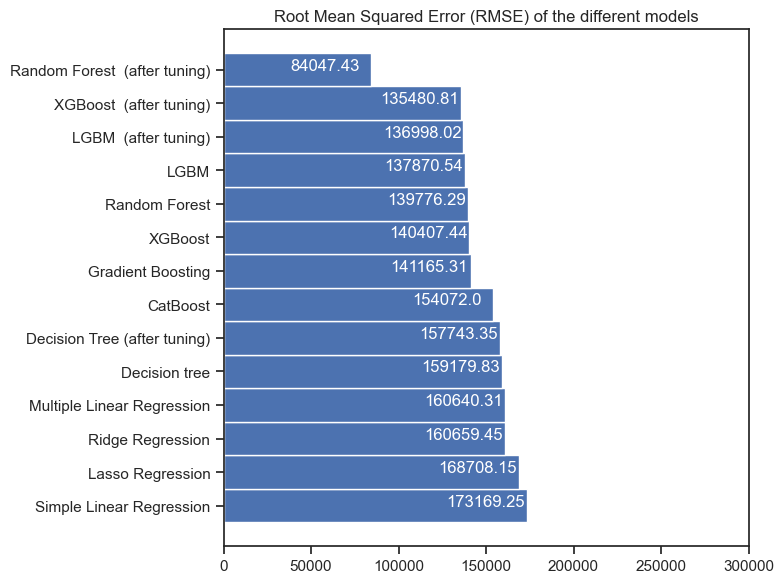

In [77]:
# Plot the results
# To save the whole image
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Plot the RMSE
plt.figure(figsize=(8,6))
plt.barh(names_reorder, results_rmse_reorder, height = 1)
plt.xlim([0,300000])
plt.title("Root Mean Squared Error (RMSE) of the different models")
for i, v in enumerate(results_rmse_reorder):
    plt.text(v-46000, i, str(round(v,2)), color='white')
plt.savefig('img/rmse.jpg')
plt.show()

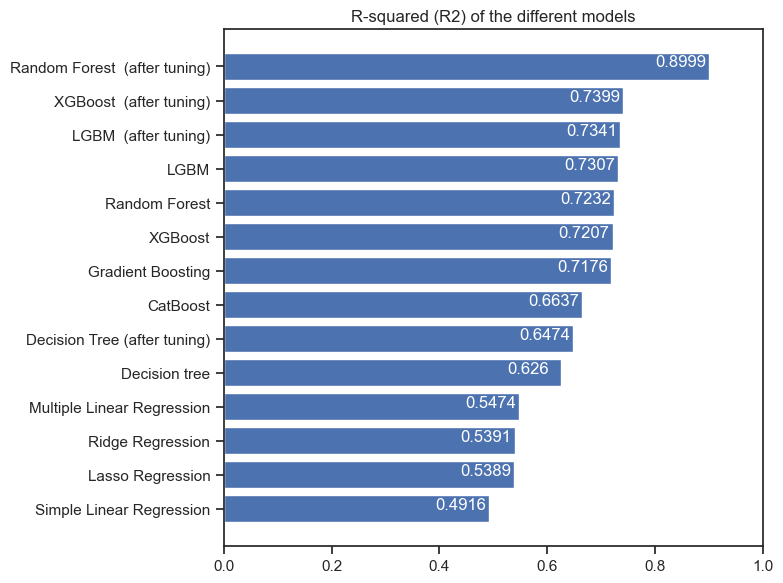

In [78]:
# Plot the R-squared
plt.figure(figsize=(8,6))
plt.barh(names_reorder, results_r2_reorder)
plt.xlim([0,1])
plt.title("R-squared (R2) of the different models")
for i, v in enumerate(results_r2_reorder):
    plt.text(v-0.1, i, str(round(v,4)), color='white')
plt.savefig('img/r2.jpg')
plt.show()

R-squared:  0.8999
Mean Absolute Error (MAE):  45981.8796
Mean Squared Error (MSQ):  7063970633.8345
Root Mean Squared Error (RMSE):  84047.4309


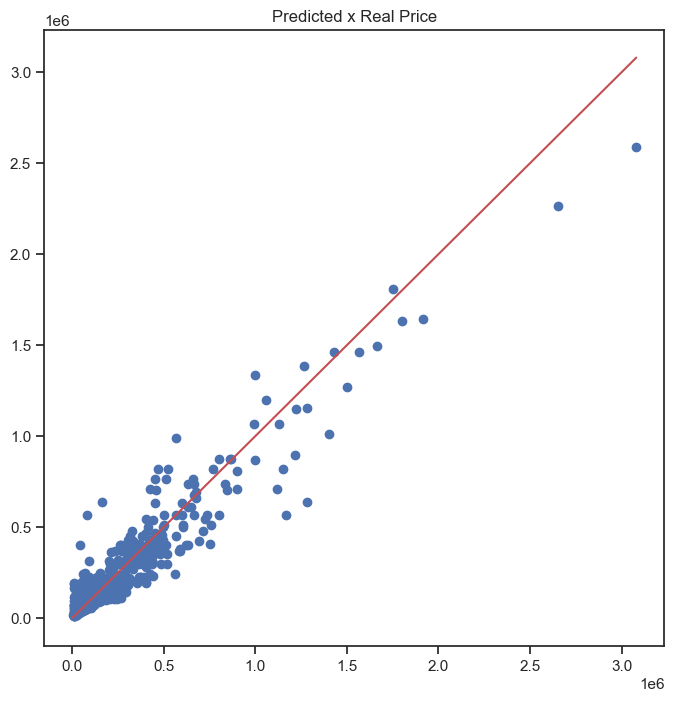

In [74]:
# Visualized predicted x Real Price for the best model
# y predicted by Model 6b
y_pred = model6b.predict(X_test)
r2_6b, rmse_6b = evaluate_model(y_test, y_pred)

# Plot the figure
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.title('Predicted x Real Price')
plt.savefig('img/predicted_x_realprice.jpg')
plt.show()

# 9. Conclusion

In this project, we analyzed the dataset, and verified the features that influence the Price of the House. After we constructed several models that estimates the price of houses, we constructed one with quite good performance (R-squared = 0.8999  and RMSE = 84047.4309).

The model is a function that assigns the predicted Price to each combination of data (Area, Room, Parking, Warehouse, Elevator).

This is a small dataset, with only 7 columns and 3479 values, which limits the analysis, but the same analysis can be made for very larger datasets.